In [22]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import et_xmlfile as et
import seaborn as sns

In [10]:
# Firstly we are creating a df of the available cities from the api and countries to extract all the data we can.
url='http://www.emotionalcities.com/api/getCountryList'
html = requests.get(url)
soup = BeautifulSoup(html.content, 'html.parser')



In [11]:
city = soup.find_all('city')
countryname = soup.find_all('name')
country = soup.find_all('country')

In [12]:
# Find the city names in the xml file from the url.
cityd = []
for i in range(0,len(city)):
    rows = [city[i].get_text()]
    cityd.append(rows)
cityd

[['Kabul'],
 ['Fier'],
 ['Goim'],
 ['Pago Pago'],
 ['Panam'],
 ['Buenos Aires'],
 ['Tigre'],
 ['Munro'],
 ['Comodoro Rivadavia'],
 ['Santa Fe'],
 ['Santiago Del Estero'],
 ['La Plata'],
 ['Villa Carlos Paz'],
 ['Tucuman'],
 ['Cmte Luis Piedra Buena'],
 ['Jujuy'],
 ['Neuquen'],
 ['Rio Gallegos'],
 ['Leandro N Alem'],
 ['Cipolletti'],
 [' Catriel'],
 ['Salto'],
 ['Yerevan'],
 ['Adelaide'],
 ['Brisbane'],
 ['Canberra'],
 ['Toowoomba'],
 ['Sydney'],
 ['Newcastle'],
 ['Perth'],
 ['Singleton'],
 ['Melbourne'],
 ['Gold Coast'],
 ['Macau'],
 ['Sippy Downs'],
 ['Launceston'],
 ['Parramatta'],
 ['Coomera'],
 ['Wien'],
 ['Dornbirn'],
 ['Baku'],
 ['Manama'],
 ['Minsk'],
 ['Etterbeek'],
 ['Gent'],
 ['Assenois'],
 ['Brussels'],
 ['Leuven'],
 ['Tienen'],
 ['Liège'],
 ['Oostende'],
 ['Genk'],
 ['Antwerp'],
 ['Lummen'],
 ['Mandu'],
 ['Santa Cruz'],
 ['Santa Cruz De La Sierra'],
 ['Sarajevo'],
 ['Mostar'],
 ['Banja Luka'],
 ['Prijedor'],
 ['Sao Paulo'],
 ['Campina Grande'],
 ['Farroupilha'],
 ['Brasilia

In [13]:
citydf = pd.DataFrame(cityd, columns = ['city'], dtype = str)
citydf

,city
0,Kabul
1,Fier
2,Goim
3,Pago Pago
4,Panam
...,...
790,Montevideo
791,Caracas
792,Ho Chi Minh
793,Hai Duong


In [14]:
countryd = []
for i in range(0,len(country)):
    rows = [countryname[i].get_text()]
    countryd.append(rows)

countrydf = pd.DataFrame(countryd, columns = ['country'], dtype = str)


countrydf

,country
0,Afghanistan
1,Albania
2,American Samoa
3,Andorra
4,Argentina
...,...
89,United Kingdom
90,United States
91,Uruguay
92,Venezuela


In [15]:
dataframes = pd.DataFrame()
dataframes

""


In [16]:
cities = ['Chicago', 'Milano', 'Tel Aviv', 'New York', 'Mumbai', 'Tokyo', 'Stockholm', 'Amsterdam', 'Bristol', 'Paris', 'Cape Town', 'Cairo', 'Singapore', 'Berlin', 'Moscow', 'Budapest', 'Kabul', 'Kampala', 'Londonerry', 'Dublin', 'Belfast', 'Sydney', 'Lagos', 'Madrid', 'Lisbon', 'Oslo', 'Toronto','Nairobi','Hong Kong', 'Osaka', 'Munich']
url_base = "http://www.emotionalcities.com/api/getCityMood/{}/2015-1-1/2190"
dataframes = []
# // Begin a loop, dealing with series one by one:
for i in range(len(cities)):
    c = cities[i]
    s = c.replace(' ','')
    print(c)
    URL = url_base.format(c)
    print(URL)
    # // Request the html from the URL:
    html = requests.get(URL)
   
    # // Get the soup of this page
    soup = BeautifulSoup(html.content, 'html.parser')
    # // Now get what we want from the page: 
    date = soup.find_all('date')
    value = soup.find_all('value')
    status = soup.find_all('status')
    median = soup.find_all('median')
    for j in range(0,len(median)):
        rows = [date[j].get_text(),value[j].get_text(), c]
        dataframes.append(rows)
        df = pd.DataFrame(dataframes,columns=['date', 'value', 'city'])
    
    


Chicago
http://www.emotionalcities.com/api/getCityMood/Chicago/2015-1-1/2190
Milano
http://www.emotionalcities.com/api/getCityMood/Milano/2015-1-1/2190
Tel Aviv
http://www.emotionalcities.com/api/getCityMood/Tel Aviv/2015-1-1/2190
New York
http://www.emotionalcities.com/api/getCityMood/New York/2015-1-1/2190
Mumbai
http://www.emotionalcities.com/api/getCityMood/Mumbai/2015-1-1/2190
Tokyo
http://www.emotionalcities.com/api/getCityMood/Tokyo/2015-1-1/2190
Stockholm
http://www.emotionalcities.com/api/getCityMood/Stockholm/2015-1-1/2190
Amsterdam
http://www.emotionalcities.com/api/getCityMood/Amsterdam/2015-1-1/2190
Bristol
http://www.emotionalcities.com/api/getCityMood/Bristol/2015-1-1/2190
Paris
http://www.emotionalcities.com/api/getCityMood/Paris/2015-1-1/2190
Cape Town
http://www.emotionalcities.com/api/getCityMood/Cape Town/2015-1-1/2190
Cairo
http://www.emotionalcities.com/api/getCityMood/Cairo/2015-1-1/2190
Singapore
http://www.emotionalcities.com/api/getCityMood/Singapore/2015-1-1/

In [33]:
df['date'] = pd.to_datetime(df['date'])
df['value'] = df['value'].astype(float)
df.dtypes

date     datetime64[ns]
value           float64
city             object
dtype: object

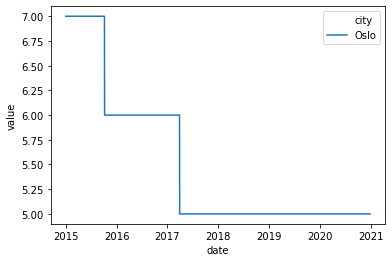

In [47]:


sns.lineplot(data=df[df['city']=='Oslo'],x='date',y='value',hue='city')


In [34]:
cities = ['Chicago', 'Milano', 'Paris', 'Tokyo', 'Tel Aviv']
url_base = "http://www.emotionalcities.com/api/getCityMood/{}/2015-1-1/2190"
dataframes_list = []
# // Begin a loop, dealing with series one by one:
c = cities[i]
s = c.replace(' ','')
s = pd.DataFrame()
print(s.dtypes)
print(c)
URL = url_base.format(c)
print(URL)
    # // Request the html from the URL:
html = requests.get(URL)
   
    # // Get the soup of this page
soup = BeautifulSoup(html.content, 'html.parser')
   
    # // Now get what we want from the page: 
date = soup.find_all('date')

value = soup.find_all('value')
status = soup.find_all('status')
median = soup.find_all('median')
#for j in range(0,len(median)):
#    rows = [date[j].get_text(),value[j].get_text()]
#    print(s.append(rows))
print(date[0].get_text())

Series([], dtype: object)
Tel Aviv
http://www.emotionalcities.com/api/getCityMood/Tel Aviv/2015-1-1/2190
2015-01-01
